In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
import os

In [2]:
os.chdir(r"/Users/sijoyfarnandiz/Documents/python data")

In [3]:
os.listdir()

['.DS_Store',
 'car_done.csv',
 'bankloan.sas7bdat',
 'diamonds.csv',
 'winequality-red.csv',
 'TaxiFare.csv',
 'bank.sarthak.xlsx',
 'Black Friday data',
 'HR_comma_sep.csv',
 '55 Nov18 SVM HousePriceRegression PGA15',
 'LoansData.csv']

In [4]:
df=pd.read_excel("bank.xlsx")

In [5]:
df.head(60)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [6]:
df["previous"].unique()

array([ 0,  1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37])

In [7]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [8]:
df["poutcome"].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [9]:
df["deposit"].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [12]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

<AxesSubplot:>

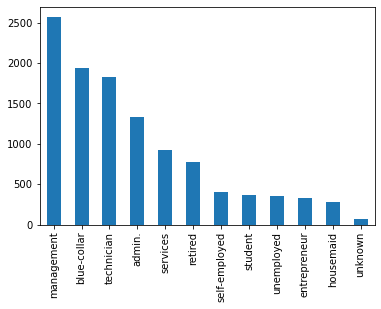

In [15]:
df["job"].value_counts().plot.bar()

<AxesSubplot:>

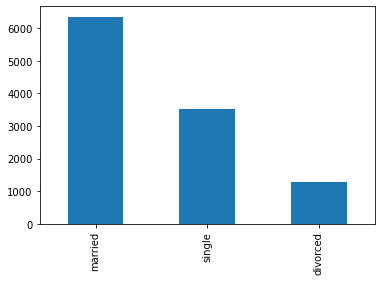

In [16]:
df["marital"].value_counts().plot.bar()

<AxesSubplot:>

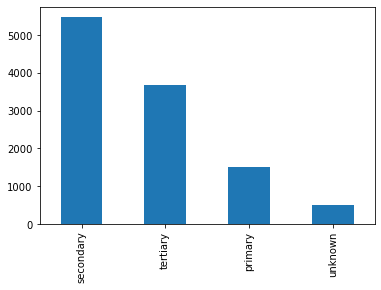

In [17]:
df["education"].value_counts().plot.bar()

In [18]:
df["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [19]:
df["balance"].median()

550.0

In [20]:
#Adding median value in dataset
df["balance"]=np.where((df["balance"]==0.0),550, df["balance"])

In [21]:
df.describe(percentiles=[0.01, 0.02,0.03, 0.04, 0.05, 0.1, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,11162.0,41.231948,11.913369,18.0,22.0,24.0,25.0,25.00,26.00,28.0,32.0,39.0,49.00,58.0,61.00,64.00,68.00,72.00,77.00,95.0
balance,11162.0,1566.676850,3210.328982,-6847.0,-522.0,-367.0,-244.0,-147.36,-54.95,26.0,215.0,550.0,1708.00,3897.6,6026.45,6987.48,8090.36,10086.00,13226.98,81204.0
day,11162.0,15.658036,8.420740,1.0,1.0,2.0,2.0,2.00,3.00,4.0,8.0,15.0,22.00,28.0,30.00,30.00,30.00,30.00,31.00,31.0
duration,11162.0,371.993818,347.128386,2.0,14.0,23.0,34.0,44.00,51.00,77.0,138.0,255.0,496.00,838.0,1079.90,1148.00,1236.17,1372.34,1577.17,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,2.0,3.00,5.0,7.00,8.00,8.00,10.00,13.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0,-1.0,20.75,191.0,326.00,343.00,355.00,369.00,425.39,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.00,3.0,5.00,5.00,6.00,7.00,10.00,58.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f95598471f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95598478b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9559ad2e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9559847f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9559859310>],
 'means': []}

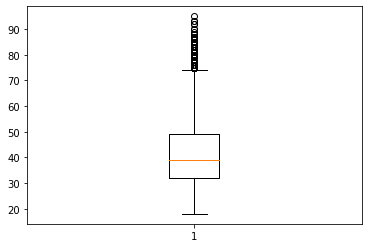

In [22]:
plt.boxplot(df["age"])

In [23]:
df["age"]=np.where(df["age"]>75, 75,df["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95599a8580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95599a8c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95599a8220>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9559a23340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9559a236a0>],
 'means': []}

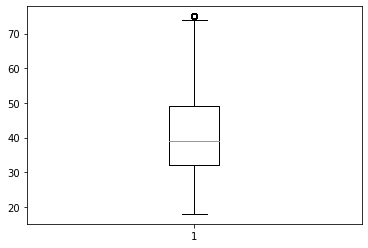

In [24]:
plt.boxplot(df["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9559a34b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955986c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95597c90a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9559a56cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9559a583a0>],
 'means': []}

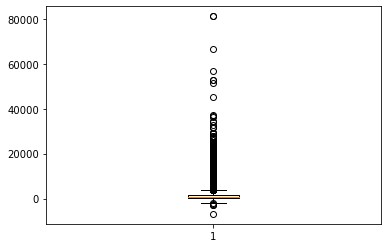

In [25]:
plt.boxplot(df["balance"])

In [26]:
df["balance"]=np.where(df["balance"]>4000, 4000,df["balance"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f955a096ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955a0a15e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f955a096b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f955a0a1ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f955a0af040>],
 'means': []}

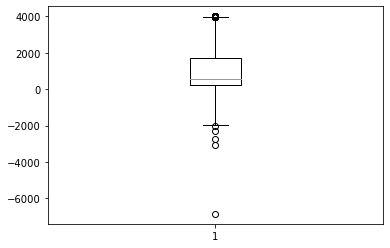

In [27]:
plt.boxplot(df["balance"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f955a109f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955a118670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f955a109c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f955a118d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f955a1850d0>],
 'means': []}

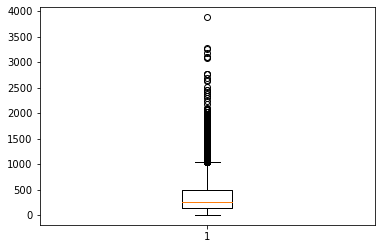

In [28]:
plt.boxplot(df["duration"])

In [29]:
df["duration"]=np.where(df["duration"]>3500, 3500,df["duration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f955a254610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955a254cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f955a2542b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f955a25e3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f955a25e730>],
 'means': []}

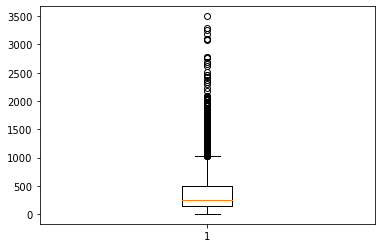

In [30]:
plt.boxplot(df["duration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f955a2ce760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955a2cee20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f955a2ce430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f955a2dc520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f955a2dc880>],
 'means': []}

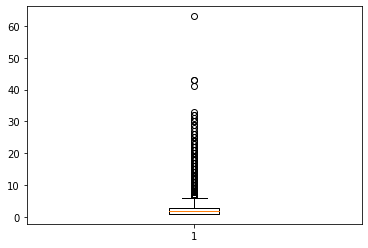

In [31]:
plt.boxplot(df["campaign"])

In [32]:
df["campaign"]=np.where(df["campaign"]>35, 35,df["campaign"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f955a407340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955a407a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f955a3f9fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f955a414100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f955a414460>],
 'means': []}

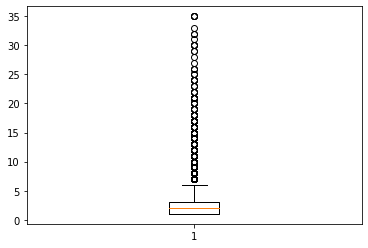

In [33]:
plt.boxplot(df["campaign"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f955a483460>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955a483b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f955a483100>],
 'medians': [<matplotlib.lines.Line2D at 0x7f955a4e8220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f955a4e8580>],
 'means': []}

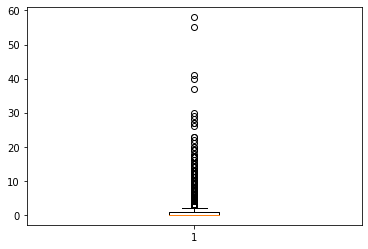

In [34]:
plt.boxplot(df["previous"])

In [35]:
df["previous"]=np.where(df["previous"]>30, 30,df["previous"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f955a5b50a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f955a5b5760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f955a5a5d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f955a5b5e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f955a5bf1c0>],
 'means': []}

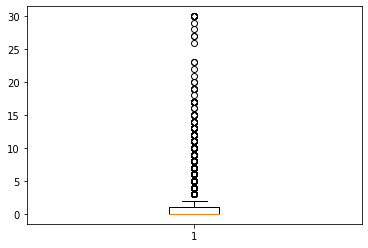

In [36]:
plt.boxplot(df["previous"])

<AxesSubplot:>

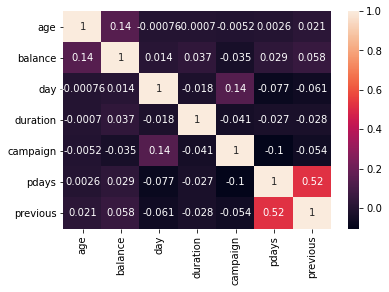

In [37]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [38]:
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.142884,-0.000760,-0.000698,-0.005238,0.002601,0.021261
balance,0.142884,1.000000,0.014358,0.037254,-0.035319,0.029193,0.058199
day,-0.000760,0.014358,1.000000,-0.018451,0.139887,-0.077232,-0.060602
duration,-0.000698,0.037254,-0.018451,1.000000,-0.041294,-0.027370,-0.028360
campaign,-0.005238,-0.035319,0.139887,-0.041294,1.000000,-0.104624,-0.053573
pdays,0.002601,0.029193,-0.077232,-0.027370,-0.104624,1.000000,0.523366
previous,0.021261,0.058199,-0.060602,-0.028360,-0.053573,0.523366,1.000000


In [39]:
from sklearn.preprocessing import LabelEncoder
df["default"]=LabelEncoder().fit_transform(df.deposit)
#change object into integers

In [40]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,1,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,1,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,1,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,0,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,0,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,0,550,no,yes,cellular,8,may,9,2,172,5,failure,no


In [41]:
df1=pd.get_dummies(df, 
                     columns=["job","marital","education","deposit","housing","loan","contact","month","poutcome"],
              drop_first=True)

In [42]:
df1

,age,default,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,2343,5,1042,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,1,45,5,1467,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1,1270,5,1389,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,1,2476,5,579,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,1,184,5,673,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,20,257,1,-1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,16,83,4,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,19,156,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,550,8,9,2,172,5,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
y=df1["default"]
X=df1.drop(columns=["default"])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=99)

In [46]:
log=LogisticRegression(random_state=99)

In [47]:
log.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=99)

In [48]:
print("Train Accuracy", log.score(X_train, y_train))
print("Test Accuracy", log.score(X_test, y_test))

Train Accuracy 0.9889927044669141
Test Accuracy 0.9889519259480442
